In [235]:
import scipy as sp
from scipy.special import erfc
from scipy.signal import find_peaks_cwt
import scipy.optimize as op
import numpy as np
from numpy.fft import fft, ifft
import pylab as pl
import emcee
from lmfit.models import GaussianModel
from lmfit.models import SkewedGaussianModel
%matplotlib inline

In [3]:
filename = 'run562.txt'
infile = open(filename,'r')

xvals=[];ymeas=[]
while True:
    line = infile.readline()
    if not line: break
        
    items = line.split()
    xvals.append(float(items[0]))
    ymeas.append(float(items[1]))
    
xvals = np.array(xvals[:])
ymeas = np.array(ymeas[:])

infile.close()

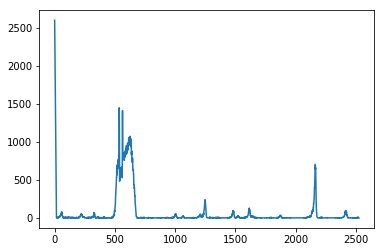

In [4]:
pl.subplot(111)
pl.plot(xvals,ymeas)
pl.show()

In [95]:
y = np.array(ymeas[1800:2000])
xtemp = np.array(xvals[1800:2000])

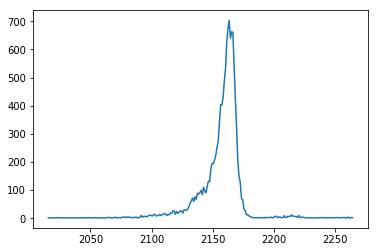

In [96]:
pl.subplot(111)
pl.plot(xtemp,y)
pl.show()

In [101]:
def gf3(p0, x):
    #this is the fuctional form that we have been using in our manual fit
    #it is the sum of a gaussian and a skewed gaussian with the same mean
    #the extra parameters r and beta are introduced
    #r is the fraction of the height of the skewed gaussian given as a pecentage
    #beta is the 'skewneess' of the second skew gaussian
    #it is the decay constant of an exponential tail on the skewed gaussian
    #this exponential tail is convolved with a gaussian resolution function
    
    amp, mu, sigma, r, beta = p0
    
    #gaussian part
    ygaus = amp * (1 - r/100) * np.exp((-(x - mu)**2)/(2 * sigma**2))
    
    #'skew' gaussian part. erfc is 1 - the error function
    yskew = amp * (r/100) * np.exp((x-mu)/beta) * erfc( (x-mu)/(sigma * np.sqrt(2))  + sigma/(beta*np.sqrt(2)))
    #yskew = 0
    #ygaus = 0
    ymod = yskew + ygaus
    
    return ymod

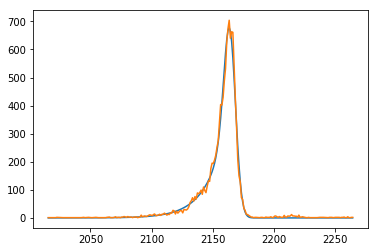

In [108]:
ytemp = gf3([ 717.00898068,2164.43769642,4.71246332,29.54070326,15.49040933],xtemp)

pl.subplot(111)
pl.plot(xtemp,ytemp)
pl.plot(xtemp,y)
pl.show()

In [162]:
ymeas[0] = 0
ynew = np.convolve(ymeas,np.flip(ytemp, axis=0), 'same')

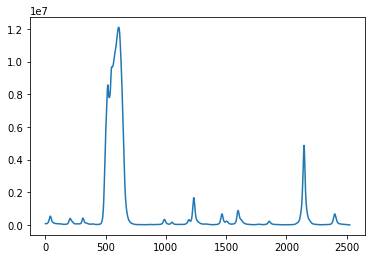

In [163]:
pl.subplot(111)
pl.plot(xvals, ynew)
pl.show()

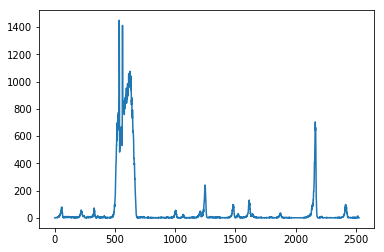

In [164]:
pl.subplot(111)
pl.plot(xvals, ymeas)
pl.show()

In [167]:
peak_pos = find_peaks_cwt(ynew, widths = np.full(len(ymeas),4))
peak_pos_2 = find_peaks_cwt(ymeas, widths = np.full(len(ynew),4))

[  26  188  290  373  488  519  586  934  992 1152 1348 1479 1689 1901
 2099]
[  44  132  204  307  391  486  507  535  589  604  713  764  784  796
  835  880  950 1010 1169 1246 1258 1365 1494 1636 1706 1918 2116 2199]


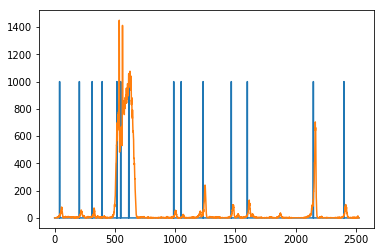

In [170]:
c

[  44  132  204  307  391  486  507  535  589  604  713  764  784  796
  835  880  950 1010 1169 1246 1258 1365 1494 1636 1706 1918 2116 2199]
[  44  132  204  307  391  486  507  535  589  604  713  764  784  796
  835  880  950 1010 1169 1246 1258 1365 1494 1636 1706 1918 2116 2199]


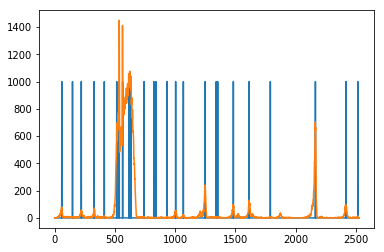

In [335]:
peak_pos = find_peaks_cwt(ymeas, widths = np.full(len(ymeas),4))
peak_pos_2 = find_peaks_cwt(ymeas, widths = np.full(len(ymeas),4))

ypeaks = np.full(len(xvals),0)
print(peak_pos)
print(peak_pos_2)
#print(xvals)
for value in xvals:
    for pos in peak_pos:
        #print(value)
        #print(pos)
        if value == pos + 0.5:
            ypeaks[pos] = 1000
            #print('debug')

ymeas[0] = 0
            
#pl.plot(xvals, ymeas)
pl.subplot(111)
pl.plot(xvals, ypeaks)
pl.plot(xvals, ymeas)
pl.show()

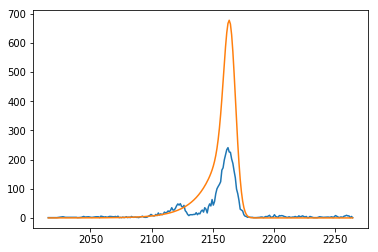

In [217]:
multiplet = ymeas[1152-100:1152+100]
xm = xvals[1152-100:1152+100]


pl.subplot(111)
pl.plot(xtemp, multiplet)
pl.plot(xtemp, ytemp)
pl.show()

/home/ben/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


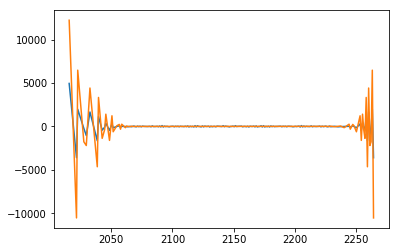

In [322]:
templateft = fft(ytemp)
multipletft = fft(multiplet)

multipletnarrowft = multipletft/templateft

pl.subplot(111)
pl.plot(xtemp, multipletft)
pl.plot(xtemp, templateft)
pl.show()


/home/ben/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


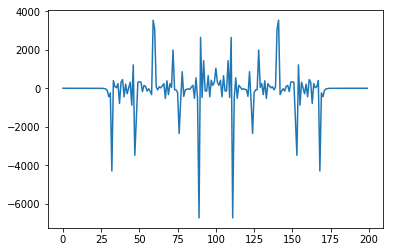

In [323]:
pl.subplot(111)
#pl.plot(xm, multipletnarrowft)



pl.plot(np.arange(200), multipletnarrowft)

pl.show()

/home/ben/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


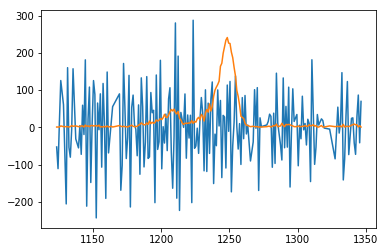

In [324]:
multipletnarrow = ifft(multipletnarrowft)

pl.subplot(111)
pl.plot(xm, multipletnarrow)
pl.plot(xm,multiplet)
pl.show()

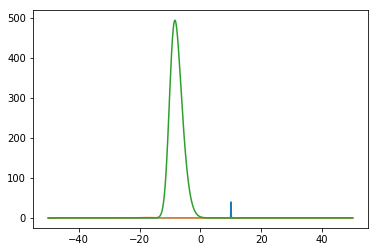

In [329]:
model1 = GaussianModel()
model2 = SkewedGaussianModel()

#amp*=sigma*np.sqrt(2*np.pi)
# set initial parameter values
params1 = model1.make_params(amplitude=5, center=10, sigma=0.05)
params2 = model2.make_params(amplitude=5, center =-20, sigma = 3, gamma = 2)


x = np.arange(-50,50, 0.01)
y1 = model1.eval(params=params1,x=x)
y2 = model2.eval(params=params2,x=x)
y3 = np.convolve(y1,y2, 'same')

pl.plot(x,y1)
pl.plot(x,y2)
pl.plot(x,y3)
pl.show()

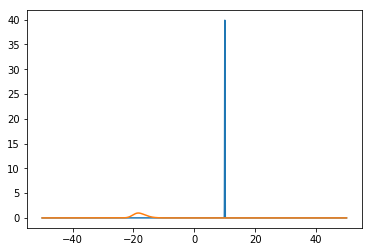

In [330]:
pl.plot(x,y1)
pl.plot(x,y2)
pl.show()

/home/ben/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


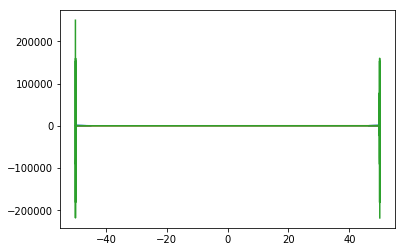

In [331]:
ft1 = fft(y1)
ft2 = fft(y2)
ft3 = fft(y3)

pl.plot(x,ft1)
pl.plot(x,ft2)
pl.plot(x,ft3)
pl.show()

/home/ben/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/home/ben/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
/home/ben/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


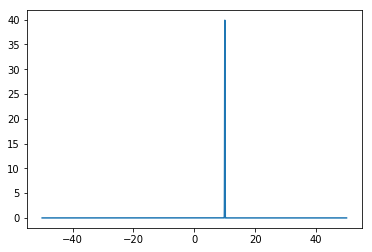

In [334]:
ct = ft3/ft2
ct2 = ifft(ct)

pl.plot(x,y1)
pl.plot(x,ct2)
pl.show()

In [333]:
#works for proper function, not for data. noise must be being amplified

In [327]:
1

1